# [F-13]파이썬으로 이미지 파일 다루기

## 13-1. 들어가며

#### Pillow, OpenCV, Matplotlib 설치하기
pip install pillow opencv-python matplotlib

#### 설치 디렉토리 구성 및 파일과 데이터셋 가져오기
mkdir -p ~/aiffel/python_image_proc/data  
ln -s ~/data/* ~/aiffel/python_image_proc/data  
ls ~/aiffel/python_image_proc/data  # 파일 확인하기

## 13-3. Pillow 사용법

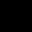

In [1]:
import numpy as np
from PIL import Image

data = np.zeros([32, 32, 3], dtype=np.uint8) 
# 가로 세로 각 32픽셀에 RGB 세가지 색상 채널 / 각 값이 부호가 없는 8비트 정수가 되어 0~255 사이의 값을 나타냄.
image = Image.fromarray(data, 'RGB')
image

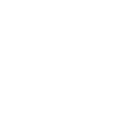

In [2]:
data = np.zeros([128, 128, 3], dtype=np.uint8)
# 가로 세로 각 128픽셀에 RGB 세가지 색상 채널
data[:, :] = [255, 255, 255]
# 흰색 이미지
image = Image.fromarray(data, 'RGB')
image

data[:, :] = [255, 255, 255] → 어떻게 3차원을 2차원 안에 넣을 수 있을까?
차원과 채널의 차이. 뭉탱이로 들어가는 느낌. 여전히 정확하게 이해한 건 아니지만 초창기부터 그렇게 사용해왔으니까..라고 이해하면 될 거 같다.
[RGB 색상표](https://www.rapidtables.org/ko/web/color/RGB_Color.html)

In [3]:
from PIL import Image
import os

cwd = os.getcwd()  # 현재 작업중인 디렉토리(cwd) 얻기
files = os.listdir(cwd)  # 그 디렉토리에 있는 모든 파일 얻기
print("Files in %r: %s" % (cwd, files))

Files in '/aiffel/aiffel': ['(11.01)iris 분류.ipynb', 'data_preprocess', '(11.04)자전거 수요예측.ipynb', '(10.25)F8 해설.ipynb', 'data_represent', '(10.31)표 분석_무역.ipynb', 'train.csv', 'image', 'lost+found', 'python_image_proc', '[E-02]수치예측하기.ipynb', 'barplot.png', '(11.02)랜덤 조짜기.ipynb', 'data_visualization', "(10.25)그래프그리기_Yuna's test.ipynb", '[F-13]파이썬으로 이미지 파일 다루기.ipynb', '.ipynb_checkpoints', 'cifar-100-python', '(10.25)F8 문제.ipynb', '(10.31)표 분류_titanic&game.ipynb', '(10.26)F9 문제.ipynb', 'Salaries.csv', 'bike_regression', 'workplace', '(11.01)손글씨 분류.ipynb', '(11.07) 밑시딥.ipynb', '(11.04)당뇨수치 예측.ipynb', 'titanic (1).csv', 'data_analysis_basic', 'aiffel']


In [4]:
from PIL import Image
import os

# 연습용 파일 경로
image_path = os.getenv('HOME')+'/aiffel/image/한강야경.jpg'

# 이미지 열기
img = Image.open(image_path)
img

# width와 height 출력
print(img.width)
print(img.height)

1600
1200


In [ ]:
# JPG 파일이 아닌 경우 JPG 파일 형식으로 저장해보기
new_image_path = os.getenv('HOME')+'/aiffel/image/한강야경.jpg'
img = img.convert('RGB')
img.save(new_image_path)

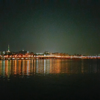

In [5]:
# 이미지 크기 변경
resized_image = img.resize((100,100))

resized_image_path = os.getenv('HOME')+'/aiffel/image/한강야경_resized.jpg'
resized_image.save(resized_image_path)
resized_image

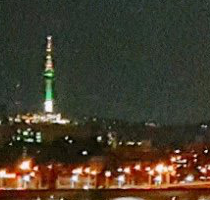

In [6]:
# .crop()을 이용하여 원하는 부분만 잘라내어 저장
box = (90, 500, 300, 700)
region = img.crop(box)

cropped_image_path = os.getenv('HOME')+'/aiffel/image/한강야경_cropped.jpg'
region.save(cropped_image_path)
region

## 13-4. Pillow를 활용한 데이터 전처리

In [47]:
# 업로드한 이미지를 nparray형태로 바꾸기
import os
import numpy as np
from PIL import Image

img = Image.open(image_path)

x = np.array(img)
print(x)
print(x.shape)

[[[20 41 46]
  [ 8 29 32]
  [ 4 23 27]
  ...
  [25 30 26]
  [24 29 25]
  [20 25 19]]

 [[18 39 42]
  [12 33 36]
  [10 29 33]
  ...
  [24 29 25]
  [24 29 25]
  [22 27 21]]

 [[10 31 34]
  [10 29 33]
  [ 9 28 32]
  ...
  [21 26 22]
  [22 27 23]
  [24 29 23]]

 ...

 [[ 9 14  8]
  [ 8 13  9]
  [ 7 12  8]
  ...
  [10 12 11]
  [ 9 11 10]
  [ 9 11 10]]

 [[11 16 10]
  [11 16 12]
  [ 8 13  9]
  ...
  [10 12 11]
  [10 12 11]
  [10 12 11]]

 [[12 17 11]
  [13 18 14]
  [ 8 13  9]
  ...
  [11 13 12]
  [11 13 12]
  [11 13 12]]]
(1200, 1600, 3)


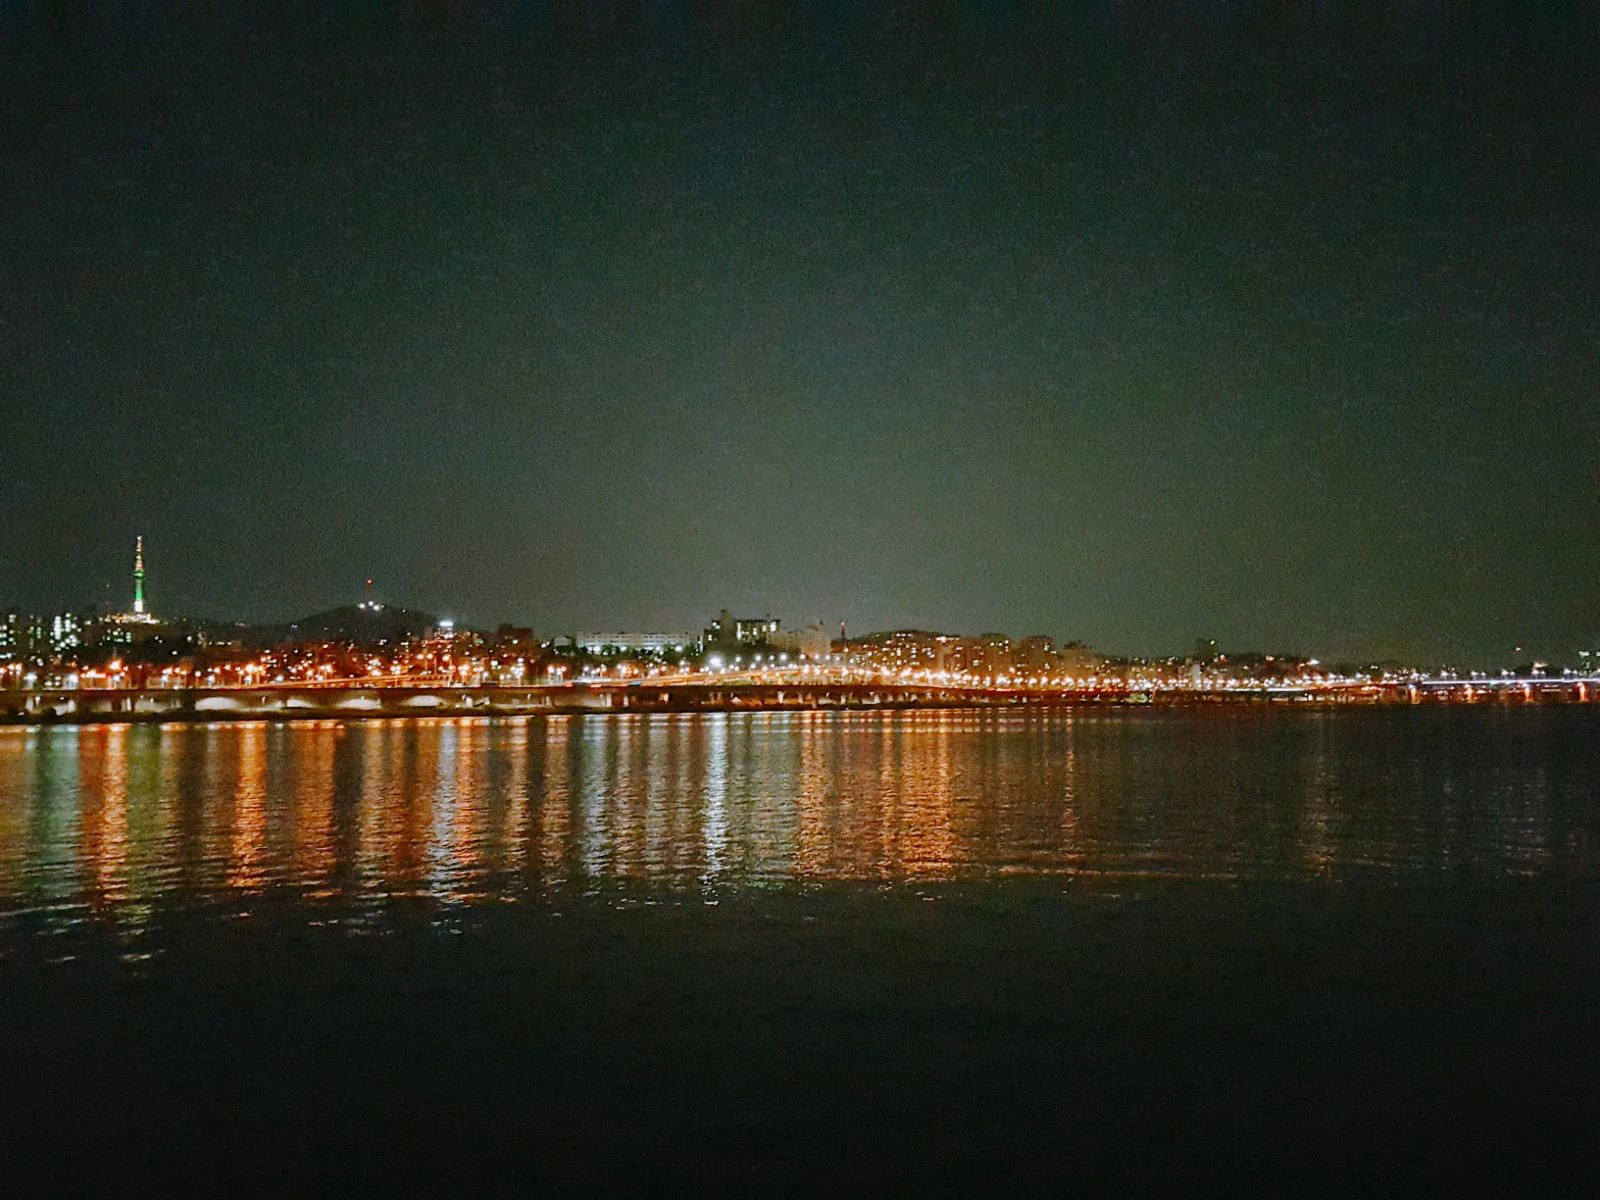

In [52]:
# 변경한 array 형태의 데이터를 이미지로 복원
image = Image.fromarray(x)
image

### CIFAR-100 데이터를 받아 개별 이미지 파일로 추출하기

In [8]:
import os
import pickle
from PIL import Image

dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/cifar-100-python'
train_file_path = os.path.join(dir_path, 'train')

with open(train_file_path, 'rb') as f:
    train = pickle.load(f, encoding='bytes')
    
print(type(train))
# train은 dictionary의 객체

<class 'dict'>


In [9]:
train.keys()
# rkr zlemfdl 문자열(str)이 아닌 b(bytes)로 되어있음

dict_keys([b'filenames', b'batch_label', b'fine_labels', b'coarse_labels', b'data'])

In [10]:
train[b'filenames'][0:5]
# b'filenames의 앞 5개만 출력 (type함수 사용시 list라는 점도 알 수 있다.)

[b'bos_taurus_s_000507.png',
 b'stegosaurus_s_000125.png',
 b'mcintosh_s_000643.png',
 b'altar_boy_s_001435.png',
 b'cichlid_s_000031.png']

In [11]:
train[b'data'][0:5]

array([[255, 255, 255, ...,  10,  59,  79],
       [255, 253, 253, ..., 253, 253, 255],
       [250, 248, 247, ..., 194, 207, 228],
       [124, 131, 135, ..., 232, 236, 231],
       [ 43,  32,  87, ...,  60,  29,  37]], dtype=uint8)

In [12]:
train[b'data'][0].shape
# b'data'의 행의 개수는 3072개 
# 3채널(빨,초,파)*1024(=32*32)씩 각 화소에 해당하므로 Numpy 배열을 원본으로 reshape 가능

(3072,)

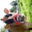

In [13]:
image_data = train[b'data'][0].reshape([32, 32, 3], order='F')   # order를 주의하세요!!
image = Image.fromarray(image_data)    # Pillow를 사용하여 Numpy 배열을 Image객체로 만들어서
image

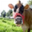

In [14]:
image_data = image_data.swapaxes(0, 1) # 이미지의 x축과 y축을 바꿔주는 작업
image = Image.fromarray(image_data)
image

In [15]:
import numpy
from tqdm import tqdm # 반복 작업의 진행 상황을 시각화해서 체크 가능

dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/cifar-100-python'
train_file_path = os.path.join(dir_path, 'train')

# image를 저장할 cifar-100-python의 하위 디렉토리(images)를 생성합니다. 
images_dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/cifar-images'
if not os.path.exists(images_dir_path):
    os.mkdir(images_dir_path)  # images 디렉토리 생성

# 32X32의 이미지 파일 50000개를 생성합니다. 
with open(train_file_path, 'rb') as f:
    train = pickle.load(f, encoding='bytes')
    for i in tqdm(range(len(train[b'filenames']))):
        filename = train[b'filenames'][i].decode()
        data = train[b'data'][i].reshape([32, 32, 3], order='F')
        image = Image.fromarray(data.swapaxes(0, 1))
        image.save(os.path.join(images_dir_path, filename))

100%|██████████| 50000/50000 [00:29<00:00, 1687.67it/s]


## 13-6. OpenCV (톺아보기)

In [16]:
import os
import cv2 as cv # OpenCV import
import numpy as np
from  matplotlib import pyplot as plt
%matplotlib inline

In [17]:
img_path = os.getenv('HOME')+'/aiffel/python_image_proc/data/cv_practice.png'
img = cv.imread(img_path)
# imread는 파일로부터 이미지를 읽어와 반환해주는 함수

In [18]:
# Convert BGR to HSV
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
# cvtColor는 컬러 스페이스 변환을 위한 함수

In [19]:
# define range of blue color in HSV
lower_blue = np.array([100,100,100])
upper_blue = np.array([130,255,255])
# 파란색 : 색상값 100~130 / 채도 100~255 / 명도 100~255

In [20]:
# Threshold the HSV image to get only blue colors
mask = cv.inRange(hsv, lower_blue, upper_blue)
# cv.inRange() : 위에 해당하는 픽셀에는 1, 그렇지 않은 픽셀에는 0을 찍어놓은 배열로 반환
# mask : 우리가 원하는 부분만 떼어낼 수 있도록 만들기

In [21]:
# Bitwise-AND mask and original image
res = cv.bitwise_and(img, img, mask=mask)
# cv.bitwise_and() : img, img -> 동일한 이미지 / mask=mask -> 해당 영역만 따오도록

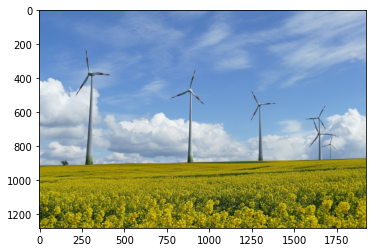

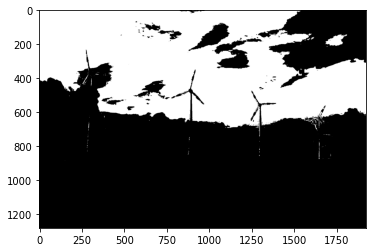

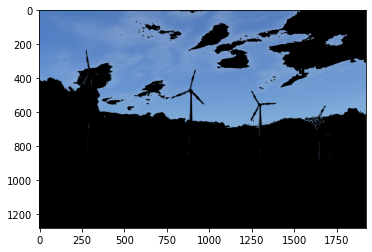

In [22]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB))
plt.show()
# img -> mask -> res(이미지에 마스크 씌워주기)
# cv.cvtColor(res, cv.COLOR_BGR2RGB) : BGR을 RGB로 변환
# cv.imshow(res)를 사용해주어도 괜찮

In [36]:
import os
import cv2 as cv
import numpy as np
from  matplotlib import pyplot as plt
%matplotlib inline

In [37]:
img_path = os.getenv('HOME')+'/aiffel/image/bear.jpg'
img = cv.imread(img_path)

In [38]:
hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)

In [39]:
lower_yellow = np.array([20,20,100])
upper_yellow = np.array([35,255,255])

mask = cv.inRange(hsv, lower_yellow, upper_yellow)

In [40]:
res = cv.bitwise_and(img, img, mask=mask)

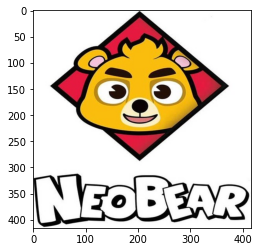

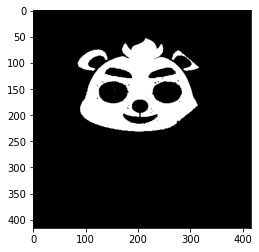

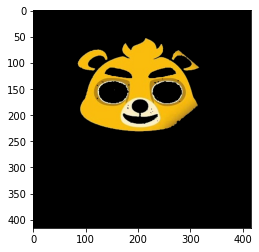

In [41]:
plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(mask, cv.COLOR_BGR2RGB))
plt.show()
plt.imshow(cv.cvtColor(res, cv.COLOR_BGR2RGB))
plt.show()

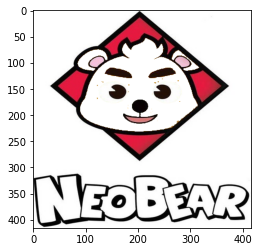

In [45]:
white_bear = cv.add(cv.cvtColor(img, cv.COLOR_BGR2RGB), cv.cvtColor(mask, cv.COLOR_BGR2RGB))

plt.imshow(white_bear)
plt.show()

얼굴 하얀 곰 만들기 성공! 노란색 추출 후에 기존 이미지와 노란색 추출한 res의 컬러스페이스를 변환해서 맞춰준 후 .add 함수 사용하면 픽셀값이 255가 되는 지점에서 흰색으로 변한다.  
처음에 cv.add(img, res)로 했을 때는 연한 노란색 얼굴 곰이 나왔다. 이번에도 광석님의 도움을 받아 완성했다. 

## 13-7. 비슷한 이미지 찾아내기

In [46]:
import os
import pickle
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm
from PIL import Image

# 전처리 시 생성했던 디렉토리 구조
dir_path = os.getenv('HOME')+'/aiffel/python_image_proc/'
train_file_path = os.path.join(dir_path, 'train')
images_dir_path = os.path.join(dir_path, 'cifar-images')

In [47]:
# 파일명을 인자로 받아 해당 이미지 파일과 히스토그램을 출력해 주는 함수
def draw_color_histogram_from_image(file_name):
    image_path = os.path.join(images_dir_path, file_name)
    # 이미지 열기
    img = Image.open(image_path)
    cv_image = cv2.imread(image_path)

    # Image와 Histogram 그려보기
    f=plt.figure(figsize=(10,3))
    im1 = f.add_subplot(1,2,1)
    im1.imshow(img)
    im1.set_title("Image")

    im2 = f.add_subplot(1,2,2)
    color = ('b','g','r')
    for i,col in enumerate(color):
        # image에서 i번째 채널의 히스토그램을 뽑아서(0:blue, 1:green, 2:red)
        histr = cv2.calcHist([cv_image],[i],None,[256],[0,256])   
        im2.plot(histr,color = col)   # 그래프를 그릴 때 채널 색상과 맞춰서 그립니다.
    im2.set_title("Histogram")

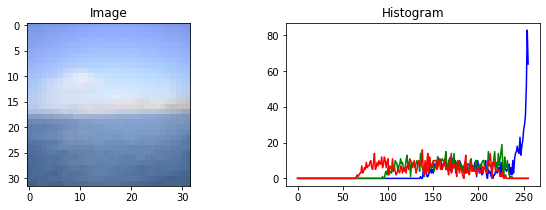

In [48]:
draw_color_histogram_from_image('adriatic_s_001807.png')

In [49]:
def get_histogram(image):
    histogram = []

    # Create histograms per channels, in 4 bins each.
    for i in range(3):
        channel_histogram = cv2.calcHist(images=[image],
                                         channels=[i],
                                         mask=None,
                                         histSize=[4],  # 히스토그램 구간을 4개로 한다.
                                         ranges=[0, 256])
        histogram.append(channel_histogram)  

    histogram = np.concatenate(histogram)
    histogram = cv2.normalize(histogram, histogram)

    return histogram

In [50]:
# get_histogram() 확인용 코드
filename = train[b'filenames'][0].decode()
file_path = os.path.join(images_dir_path, filename)
image = cv2.imread(file_path)
histogram = get_histogram(image)
histogram

array([[0.3126804 ],
       [0.4080744 ],
       [0.14521089],
       [0.21940625],
       [0.18654831],
       [0.23742512],
       [0.30208108],
       [0.35931748],
       [0.06465594],
       [0.35825753],
       [0.36991683],
       [0.29254165]], dtype=float32)

In [51]:
import os
import pickle
import cv2
import numpy as np
from matplotlib import pyplot as plt
from tqdm import tqdm

def build_histogram_db():
    histogram_db = {}

    #디렉토리에 모아 둔 이미지 파일들을 전부 리스트업합니다. 
    path = images_dir_path
    file_list = os.listdir(images_dir_path)

    # [[YOUR CODE]]
    for file_name in tqdm(file_list):
        file_path = os.path.join(images_dir_path, file_name)
        image = cv2.imread(file_path)

        histogram = get_histogram(image)

        histogram_db[file_name] = histogram

    return histogram_db

In [52]:
histogram_db = build_histogram_db()
histogram_db['adriatic_s_001807.png']

100%|██████████| 49999/49999 [00:06<00:00, 7480.15it/s]


array([[0.        ],
       [0.        ],
       [0.29744893],
       [0.5828624 ],
       [0.        ],
       [0.17107612],
       [0.41608465],
       [0.29315054],
       [0.        ],
       [0.34301192],
       [0.37224102],
       [0.16505837]], dtype=float32)

In [53]:
def get_target_histogram():
    filename = input("이미지 파일명을 입력하세요: ")
    if filename not in histogram_db:
        return print('유효하지 않은 이미지 파일명입니다.')
    return histogram_db[filename]

In [54]:
target_histogram = get_target_histogram()
target_histogram

이미지 파일명을 입력하세요: adriatic_s_001807.png


array([[0.        ],
       [0.        ],
       [0.29744893],
       [0.5828624 ],
       [0.        ],
       [0.17107612],
       [0.41608465],
       [0.29315054],
       [0.        ],
       [0.34301192],
       [0.37224102],
       [0.16505837]], dtype=float32)

In [55]:
def search(histogram_db, target_histogram, top_k=5):
    results = {}

    # Calculate similarity distance by comparing histograms.    
    for file_name, histogram in tqdm(histogram_db.items()):
        distance = cv2.compareHist(H1=target_histogram,
                                   H2=histogram,
                                   method=cv2.HISTCMP_CHISQR)

        results[file_name] = distance

    results = dict(sorted(results.items(), key=lambda item: item[1])[:top_k])

    return results

In [56]:
result = search(histogram_db, target_histogram)
result

100%|██████████| 49999/49999 [00:00<00:00, 571193.96it/s]


{'adriatic_s_001807.png': 0.0,
 'baby_s_001654.png': 0.047506706444185816,
 'fogbank_s_000423.png': 0.059270738493642845,
 'tank_s_000442.png': 0.060966690827361725,
 'dessert_plate_s_000124.png': 0.06113711905561663}

In [57]:
def show_result(result):
    f=plt.figure(figsize=(10,3))
    for idx, filename in enumerate(result.keys()):    
        # [[YOUR CODE]]
        img_path = os.path.join(images_dir_path, filename)
        im = f.add_subplot(1,len(result),idx+1)
        img = Image.open(img_path)
        im.imshow(img)

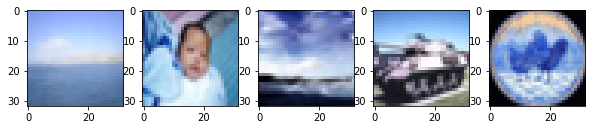

In [58]:
show_result(result)

이미지 파일명을 입력하세요: adriatic_s_001807.png


100%|██████████| 49999/49999 [00:00<00:00, 563810.50it/s]


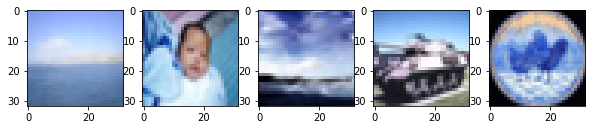

In [59]:
target_histogram = get_target_histogram()
result = search(histogram_db, target_histogram)
show_result(result)

비슷한 이미지 찾아내기는 이번주 주말에 다시..